# Projeto de ETL: Dados de Clima

### Extração: Carregando os dados climáticos de um arquivo CSV.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


### Transformação: Converter a temperatura para °C e extrair somente os dados de 2016.

In [140]:
# Converter a temperatura para °C
df['temperatura'] = df['temperatura'].subtract(273.15)

In [159]:
# Converter a data para datatime
import datetime
df['data'] = pd.to_datetime(df['data'])

# Digite um período
print('Digite um período de 2012-10-01 a 2017-11-30:')
data1 = input(datetime.date)
data2 = input(datetime.date)
print(f'Período selecionado: {data1} a {data2}')


Digite um período de 2012-10-01 a 2017-11-30:


Período selecionado: 2015-11-01 a 2015-12-01


In [160]:
# Extraindo somente os dados do período desejado
selecao = (df['data'] >= data1) & (df['data'] <= data2)
df_transformado = df[selecao]
df_transformado

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
27012,13.000000,1009.0,93.0,180.0,1.0,Sábado,2015-11-01 00:00:00
27013,12.818896,1009.0,90.0,166.0,2.0,Sábado,2015-11-01 01:00:00
27014,12.590000,1009.0,87.0,150.0,3.0,Sábado,2015-11-01 02:00:00
27015,12.411810,1009.0,92.0,150.0,2.0,Sábado,2015-11-01 03:00:00
27016,12.200000,1010.0,100.0,150.0,1.0,Sábado,2015-11-01 04:00:00
...,...,...,...,...,...,...,...
27728,0.810000,1022.0,64.0,120.0,5.0,Domingo,2015-11-30 20:00:00
27729,1.100451,1021.0,64.0,141.0,5.0,Domingo,2015-11-30 21:00:00
27730,1.490000,1021.0,64.0,170.0,5.0,Domingo,2015-11-30 22:00:00
27731,1.178482,1027.0,66.0,131.0,3.0,Domingo,2015-11-30 23:00:00


### Carregamento: Criando um gráfico para visualizar os dados de período selecionado.

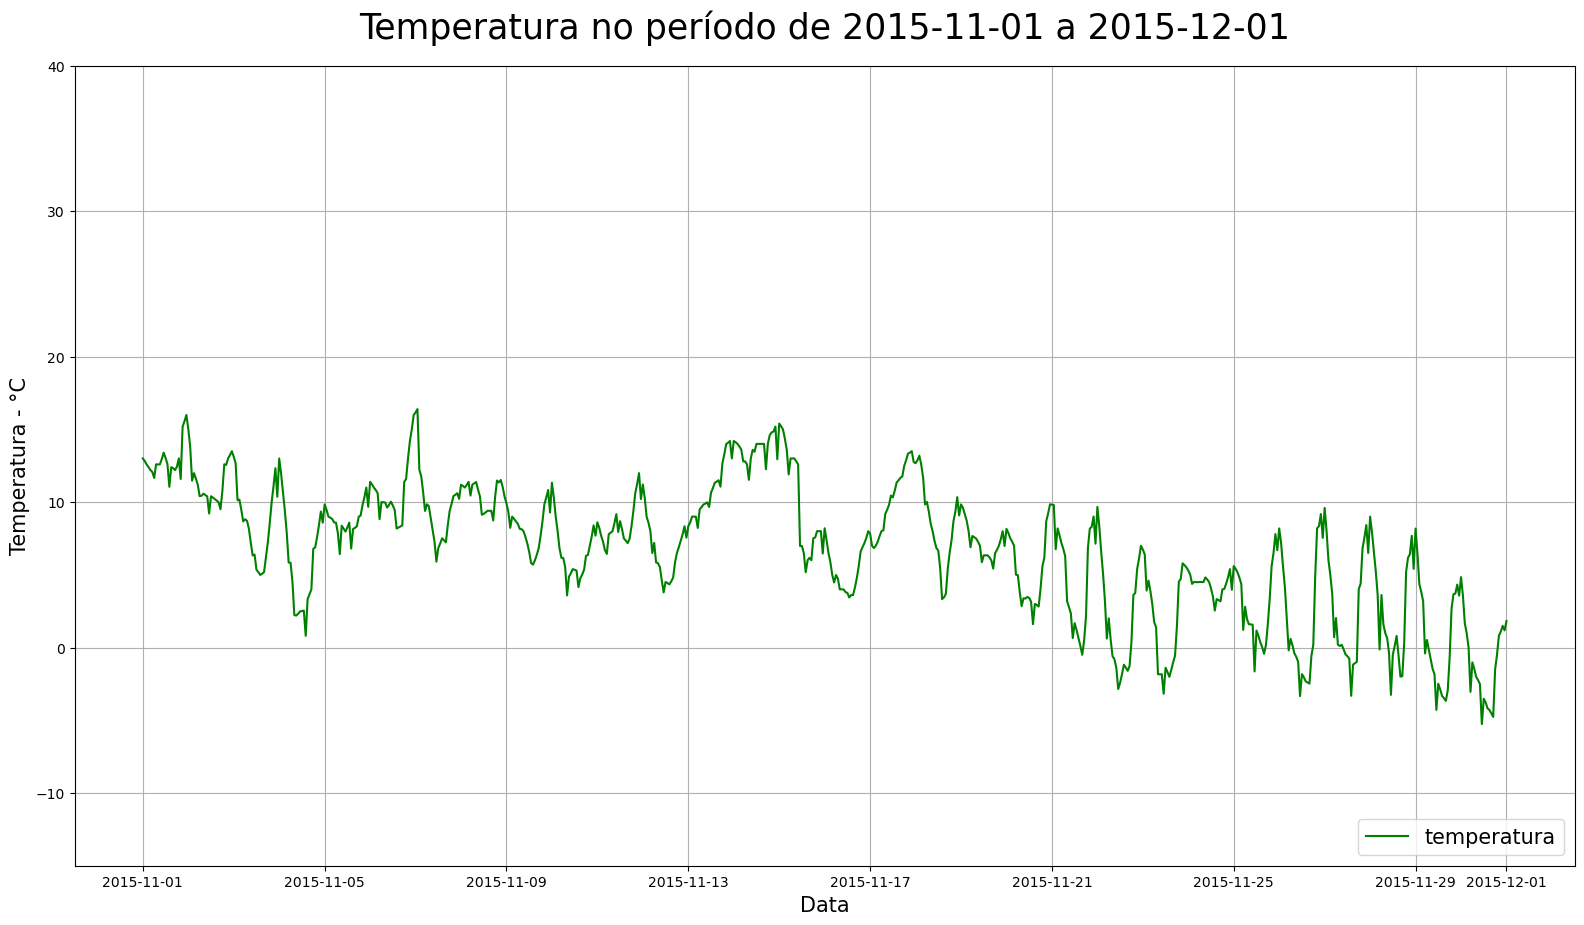

In [161]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

# plotando o gráfico 1
eixo.grid(True)
eixo.plot(df_transformado['data'], df_transformado['temperatura'], color = 'g')
eixo.set_ylim(-15,40)
eixo.set_title(f'Temperatura no período de {data1} a {data2}', fontsize=25, pad=20)
eixo.legend(['temperatura'], loc='lower right', fontsize=15)
eixo.set_ylabel('Temperatura - °C', fontsize=15)
eixo.set_xlabel('Data', fontsize=15)

fig.savefig('grafico.png', bbox_inches = 'tight')

In [162]:
# Salvando novo arquivo.
df_transformado.to_csv('dados_transformados.csv', index=False)